In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
file_path = "/content/Enrollments_Dataset.xlsx"
df = pd.read_excel(file_path)
print(df.head())

  Timestamp Parent name Child Name   Age Communication Preference  \
0       NaT    Raphaela       Elsa   9.0                      NaN   
1       NaT    Raphaela       Elsa   9.0                      NaN   
2       NaT      Swetha     Vivaan   7.0                      NaN   
3       NaT      Swetha     Vivaan   7.0                      NaN   
4       NaT    Raphaela        Ana  13.0                      NaN   

        Teacher Name              Source Source details Class ID     Type  \
0  Clark Vandeventer  Friends and Family            NaN        7  Onetime   
1     Nicole Pauling  Friends and Family            NaN       14  Onetime   
2      Bill Thompson  Friends and Family            NaN       18  Onetime   
3  Clark Vandeventer  Friends and Family            NaN       19  Onetime   
4  Clark Vandeventer  Friends and Family            NaN       11  Onetime   

   ... Score - Another class  Yes Maybe   No Final score  \
0  ...                   0.0  0.0   0.0  0.0         0.0   
1 

In [80]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6509 entries, 0 to 6508
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  4392 non-null   datetime64[ns]
 1   Parent name                4817 non-null   object        
 2   Child Name                 4817 non-null   object        
 3   Age                        4814 non-null   float64       
 4   Communication Preference   3249 non-null   object        
 5   Teacher Name               4784 non-null   object        
 6   Source                     4807 non-null   object        
 7   Source details             3750 non-null   object        
 8   Class ID                   4783 non-null   object        
 9   Type                       4783 non-null   object        
 10  Class name                 4783 non-null   object        
 11  Date                       4782 non-null   datetime64[ns]
 12  Day   

In [81]:
print(df.isnull().sum())

Timestamp                    2117
Parent name                  1692
Child Name                   1692
Age                          1695
Communication Preference     3260
Teacher Name                 1725
Source                       1702
Source details               2759
Class ID                     1726
Type                         1726
Class name                   1726
Date                         1727
Day                          1726
Start time (in PST)          1726
End time (in PST)            1726
Want another slot            6315
Country                      2464
Region                       2551
City                         2317
Timezone                     1843
Phase Mapping                1748
Topics                       1993
Attended?                    1860
Concepts                     5020
Interesting                  5017
Another class                5019
Score - Concept              1927
Score - Interesting          1927
Score - Another class        1928
Yes           

In [82]:
print(df['Timezone'].unique())
print(df['Teacher Name'].unique())

['PST' 'EST' 'CST' nan 'MST' 'IST' 'AEDT' 'GMT' 'SAST' 'IDT' 'EET' 'AEST'
 'AST' 3 'PKT' 'JST' 'EAT' 'NZDT' 4 'WAT' 'KST' 'HKT' 'AWST' 'CET' -5]
['Clark Vandeventer' 'Nicole Pauling' 'Bill Thompson' 'Keallah Smith'
 'Aaron Potsick' 'Misses Dee' 'Rae Wilson' 'Annalisa Ard' 'Cara Bailey'
 'Lianne Brunt' 'Tia Speece' 'Michaela Sellers' 'Kristen Vale da Serra'
 'Eric Zeltmann' 'Montse Limon' 'Mariposa Enamorada' 'Dana Lorelle'
 'Alan Ronald Chernoff' nan 'Amalia Fernand' 'Mary Daniels' 'Glen'
 'Kevin Lee' 'Cassy Cochrun' 'Nathaniel Noss' 'Erin Coley' 'Paige Howell'
 'Katrina Pauling' 'Sandra Panton' 'CarreiraChess' 'Les Pauling'
 'Ashton Khan' 'Marcos Del Cogliano' 'Garrett Young' 'Jes Sudbrink'
 'Erika Berry' 'Stefany Pineda' 'Vanleer T. Pierce' 'Ms. Courtney'
 'Andrea' 'Melissa Peterson' 'Miguel Rivas' 'Austin Stites'
 'Abdo Timejardine-Zomeño']


In [83]:
df = df.drop(columns=['Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37'], errors='ignore')

In [84]:
categorical_columns = ['Parent name', 'Child Name', 'Teacher Name', 'Communication Preference',
                       'Type', 'Class name', 'Country', 'Region', 'City', 'Timezone']

for col in categorical_columns:
    df[col] = df[col].fillna("Not Provided")


In [85]:
numerical_columns = ['Age', 'Score - Concept', 'Score - Interesting', 'Score - Another class', 'Final score']

for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())


In [86]:
timezone_mapping = {-5: "EST", 3: "EAT", 4: "AST"}
df['Timezone'] = df['Timezone'].replace(timezone_mapping)

In [87]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Timestamp'] = df['Timestamp'].fillna(df['Date'])

In [88]:
df = df.drop_duplicates()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4813 entries, 0 to 6494
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Timestamp                  4809 non-null   datetime64[ns]
 1   Parent name                4813 non-null   object        
 2   Child Name                 4813 non-null   object        
 3   Age                        4813 non-null   float64       
 4   Communication Preference   4813 non-null   object        
 5   Teacher Name               4813 non-null   object        
 6   Source                     4800 non-null   object        
 7   Source details             3749 non-null   object        
 8   Class ID                   4776 non-null   object        
 9   Type                       4813 non-null   object        
 10  Class name                 4813 non-null   object        
 11  Date                       4775 non-null   datetime64[ns]
 12  Day        

In [89]:
print(df.isnull().sum())

Timestamp                       4
Parent name                     0
Child Name                      0
Age                             0
Communication Preference        0
Teacher Name                    0
Source                         13
Source details               1064
Class ID                       37
Type                            0
Class name                      0
Date                           38
Day                            37
Start time (in PST)            37
End time (in PST)              37
Want another slot            4619
Country                         0
Region                          0
City                            0
Timezone                        0
Phase Mapping                 120
Topics                        304
Attended?                     171
Concepts                     3326
Interesting                  3323
Another class                3325
Score - Concept                 0
Score - Interesting             0
Score - Another class           0
Yes           

In [90]:
df['Yes'].fillna(df['Yes'].mean(), inplace=True)
df['Maybe'].fillna(df['Maybe'].mean(), inplace=True)
df['No'].fillna(df['No'].mean(), inplace=True)
df['Score - Concept'].fillna(df['Score - Concept'].mean(), inplace=True)
df['Score - Interesting'].fillna(df['Score - Interesting'].mean(), inplace=True)
df['Score - Another class'].fillna(df['Score - Another class'].mean(), inplace=True)

df['Source'].fillna('Unknown', inplace=True)
df['Source details'].fillna('Unknown', inplace=True)
df['Phase Mapping'].fillna('Unknown', inplace=True)
df['Topics'].fillna('Unknown', inplace=True)
df['Attended?'].fillna('Unknown', inplace=True)
df['Concepts'].fillna('Unknown', inplace=True)
df['Interesting'].fillna('Unknown', inplace=True)
df['Another class'].fillna('Unknown', inplace=True)
df.drop(['Want another slot', 'Class Part Number', 'ID for sequential classes'], axis=1, inplace=True)
df.dropna(subset=['Class name', 'Teacher Name', 'Date'], inplace=True)

print(df.isnull().sum())

Timestamp                   0
Parent name                 0
Child Name                  0
Age                         0
Communication Preference    0
Teacher Name                0
Source                      0
Source details              0
Class ID                    0
Type                        0
Class name                  0
Date                        0
Day                         0
Start time (in PST)         0
End time (in PST)           0
Country                     0
Region                      0
City                        0
Timezone                    0
Phase Mapping               0
Topics                      0
Attended?                   0
Concepts                    0
Interesting                 0
Another class               0
Score - Concept             0
Score - Interesting         0
Score - Another class       0
Yes                         0
Maybe                       0
No                          0
Final score                 0
dtype: int64


<ipython-input-90-bcc7d1d9f742>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-90-bcc7d1d9f742>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [91]:
cleaned_file_path = 'cleaned_dataset.xlsx'
df.to_excel(cleaned_file_path, index=False, engine='openpyxl')
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to cleaned_dataset.xlsx


In [92]:
attendance_counts = df.groupby(['Timezone', 'Start time (in PST)'])['Attended?'].apply(lambda x: (x == "Yes").sum())
attendance_counts = attendance_counts.sort_values(ascending=False)
print(attendance_counts.head(10))

Timezone  Start time (in PST)
MST       15:00:00               68
EST       16:00:00               66
MST       16:00:00               60
EST       15:00:00               57
CST       15:00:00               56
          16:00:00               52
EST       14:00:00               44
PST       16:00:00               41
EST       17:00:00               40
          13:00:00               39
Name: Attended?, dtype: int64


In [93]:
top_timezones = attendance_counts.groupby('Timezone').sum().sort_values(ascending=False)
print("Top Time Zones for Scheduling Classes:")
print(top_timezones)

Top Time Zones for Scheduling Classes:
Timezone
EST             376
MST             332
PST             242
CST             241
IST             136
Not Provided     49
AEDT             36
AST              21
JST              16
WAT              16
GMT              14
AWST              8
HKT               2
AEST              1
EAT               1
NZDT              1
IDT               1
EET               0
KST               0
CET               0
PKT               0
SAST              0
Name: Attended?, dtype: int64


In [94]:
top_timings = attendance_counts.groupby('Start time (in PST)').sum().sort_values(ascending=False)
print("Top Timings for Scheduling Classes:")
print(top_timings)


Top Timings for Scheduling Classes:
Start time (in PST)
16:00:00    280
15:00:00    272
14:00:00    169
13:00:00    133
17:00:00    125
12:00:00    112
17:30:00     65
18:00:00     51
11:00:00     51
15:30:00     51
12:30:00     49
16:30:00     47
14:30:00     30
13:35:00     23
10:00:00     16
18:15:00     11
11:30:00      8
19:00:00      0
Name: Attended?, dtype: int64


In [100]:
teacher_scores = df.groupby('Teacher Name')['Final score'].mean().sort_values(ascending=False)
print("Best Teachers:")
print(teacher_scores.head(5))

Best Teachers:
Teacher Name
Mary Daniels           3.687500
Melissa Peterson       2.588235
Dana Lorelle           2.466926
Rae Wilson             2.464516
Marcos Del Cogliano    2.370370
Name: Final score, dtype: float64


In [101]:
class_scores = df.groupby('Class name')['Final score'].mean().sort_values(ascending=False)
print("Best Classes:")
print(class_scores.head(5))

Best Classes:
Class name
Creative Writing 101                                                                                    9.000000
Forgotten Histories and Mysteries: The Dancing Plague                                                   5.166667
Draw It: Dolphin                                                                                        4.944444
Forgotten History: Mysteries and Extraordinary Stories - Egyptian mysteries and riddles                 4.416667
Forgotten History: Mysteries and Extraordinary Stories - The Disappearance of Malaysian Flight MH370    4.312500
Name: Final score, dtype: float64


In [102]:
teacher_class_scores = df.groupby(['Teacher Name', 'Class name'])['Final score'].mean().sort_values(ascending=False)
print("Best Teacher-Class Combinations:")
print(teacher_class_scores.head(10))

Best Teacher-Class Combinations:
Teacher Name    Class name                                                                                          
Annalisa Ard    Creative Writing 101                                                                                    9.000000
Nicole Pauling  Forgotten Histories and Mysteries: The Dancing Plague                                                   5.166667
Cara Bailey     Draw It: Dolphin                                                                                        4.944444
Nicole Pauling  Forgotten History: Mysteries and Extraordinary Stories - Egyptian mysteries and riddles                 4.416667
                Forgotten History: Mysteries and Extraordinary Stories - The Disappearance of Malaysian Flight MH370    4.312500
Annalisa Ard    History of Magic: Part 1                                                                                4.090909
                Enchanting Prose: A Magical Writing Workshop with Harry Pott

In [103]:
attendance_counts.to_csv("attendance_counts.csv")
teacher_scores.to_csv("teacher_scores.csv")
class_scores.to_csv("class_scores.csv")
teacher_class_scores.to_csv("teacher_class_scores.csv")
print("Insights have been saved to CSV files.")

Insights have been saved to CSV files.


In [ ]:
print(df.columns)


Index(['Timestamp', 'Parent name', 'Child Name', 'Age',
       'Communication Preference', 'Teacher Name', 'Source', 'Source details',
       'Class ID', 'Type', 'Class name', 'Date', 'Day', 'Start time (in PST)',
       'End time (in PST)', 'Want another slot', 'Country', 'Region', 'City',
       'Timezone', 'Phase Mapping', 'Topics', 'Attended?', 'Concepts',
       'Interesting', 'Another class', 'Score - Concept',
       'Score - Interesting', 'Score - Another class', 'Yes', 'Maybe', 'No',
       'Final score', 'ID for sequential classes', 'Class Part Number'],
      dtype='object')


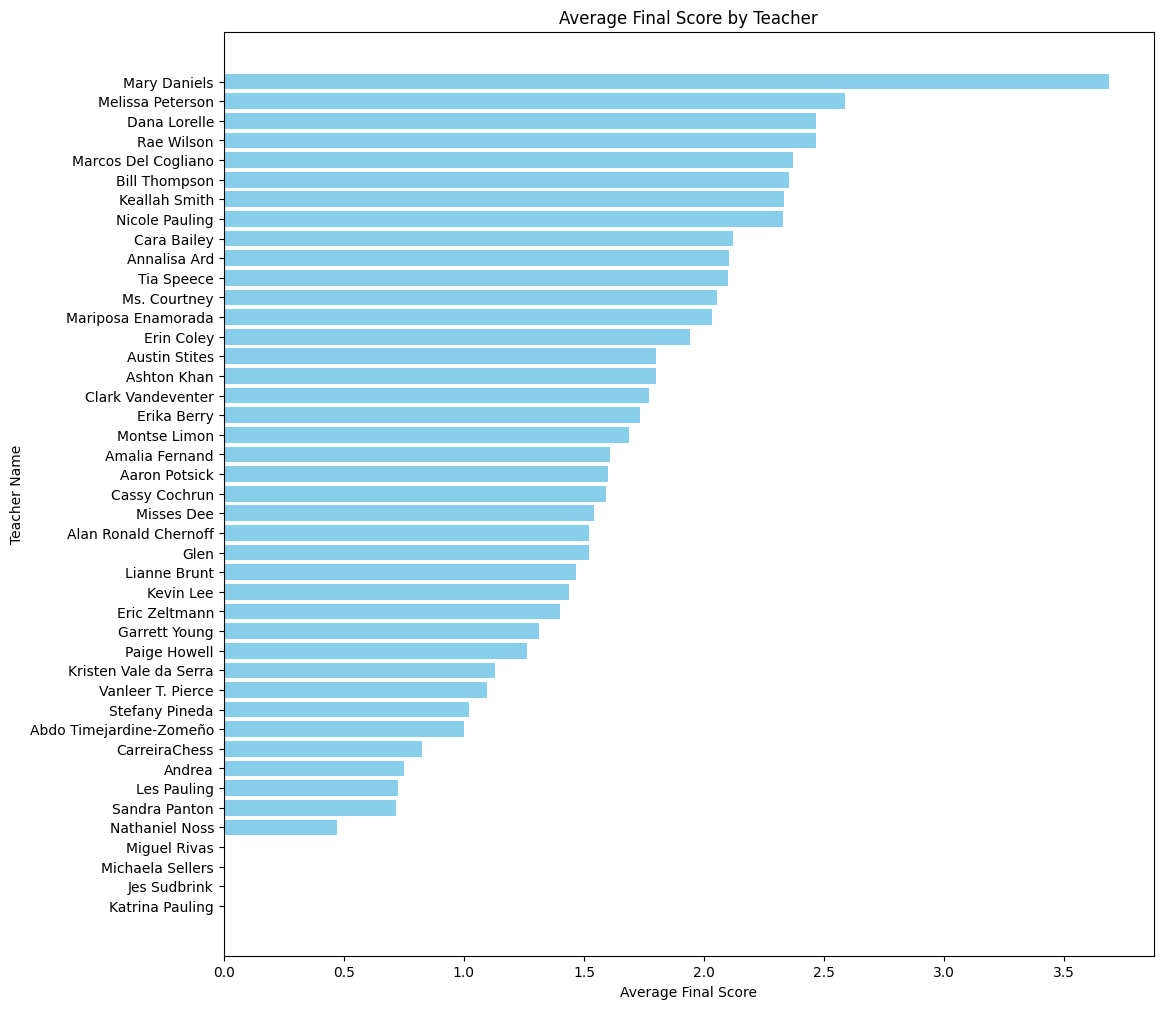

In [107]:
teacher_df = df.groupby('Teacher Name')['Final score'].mean().reset_index()
teacher_df = teacher_df.sort_values(by='Final score', ascending=False)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.barh(teacher_df['Teacher Name'], teacher_df['Final score'], color='skyblue')
plt.xlabel('Average Final Score')
plt.ylabel('Teacher Name')
plt.title('Average Final Score by Teacher')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

<ipython-input-108-714e4a30902e>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




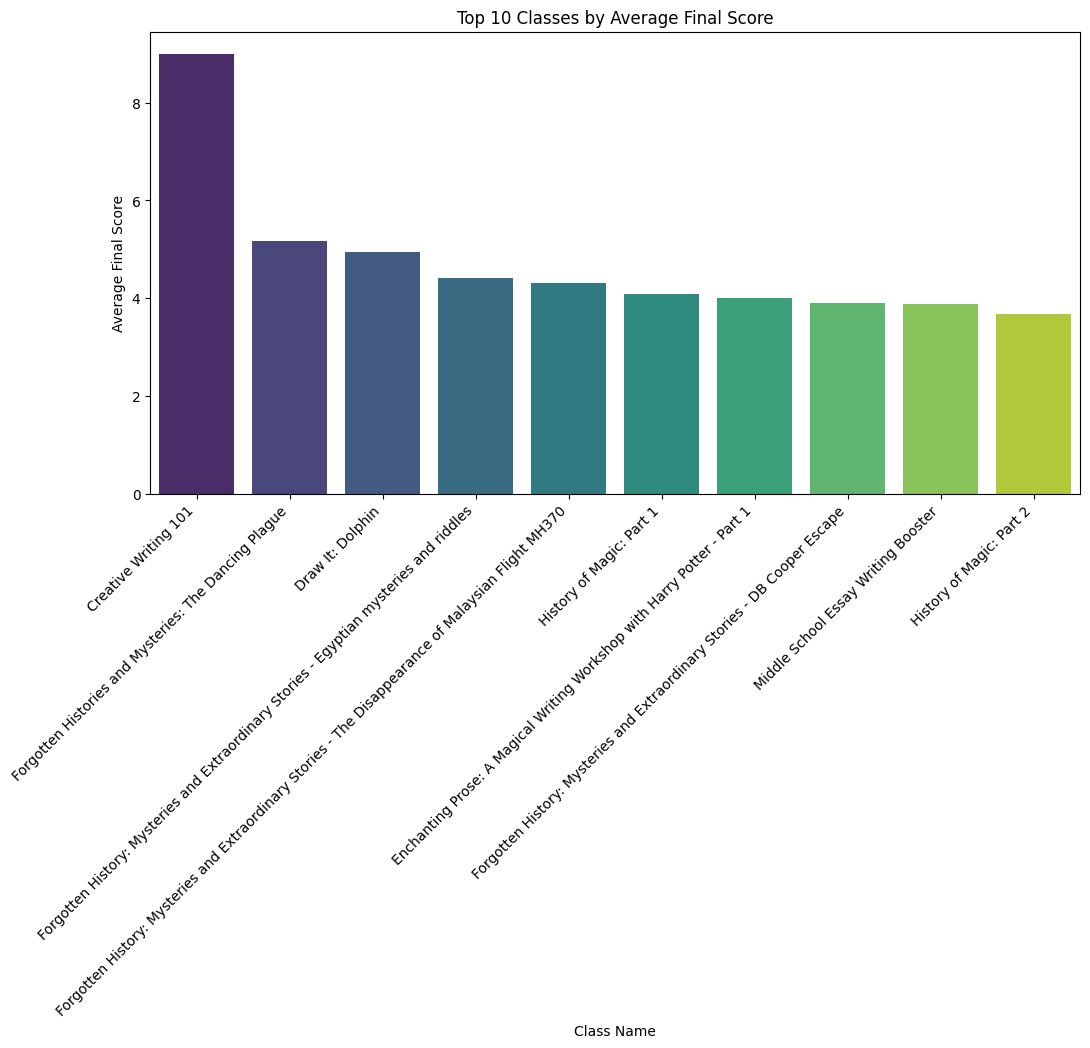

In [108]:
class_df = df.groupby('Class name')['Final score'].mean().reset_index()
class_df = class_df.sort_values(by='Final score', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Class name', y='Final score', data=class_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class Name')
plt.ylabel('Average Final Score')
plt.title('Top 10 Classes by Average Final Score')
plt.show()

In [110]:
if 'Another class' in df.columns and 'Teacher Name' in df.columns:
    teacher_booking_counts = df[df['Another class'] == 'Yes'].groupby('Teacher Name').size().sort_values(ascending=False)

    print("Teachers with most 'Another class' bookings:")
    print(teacher_booking_counts)
else:
    print("'Another class' or 'Teacher Name' column not found in the DataFrame.")


Teachers with most 'Another class' bookings:
Teacher Name
Annalisa Ard               77
Dana Lorelle               63
Aaron Potsick              62
Nicole Pauling             54
Cara Bailey                53
Amalia Fernand             45
Ms. Courtney               45
Misses Dee                 44
Erin Coley                 37
Rae Wilson                 35
Clark Vandeventer          27
Lianne Brunt               25
Paige Howell               24
Kevin Lee                  21
Tia Speece                 19
Ashton Khan                18
Montse Limon               15
Bill Thompson              14
Austin Stites              13
Keallah Smith              12
Alan Ronald Chernoff       11
Cassy Cochrun              11
Melissa Peterson            9
Kristen Vale da Serra       9
Garrett Young               7
Mariposa Enamorada          6
Mary Daniels                6
Nathaniel Noss              6
Stefany Pineda              5
Marcos Del Cogliano         5
Eric Zeltmann               4
Erika Berry 

In [111]:
if 'Another class' in df.columns and 'Class name' in df.columns:
    course_booking_counts = df[df['Another class'] == 'Yes'].groupby('Class name').size().sort_values(ascending=False)
    print("Courses with most 'Another class' bookings:")
    print(course_booking_counts)
else:
    print("'Another class' or 'Class name' column not found in the DataFrame.")


Courses with most 'Another class' bookings:
Class name
Introduction to Coding with Python                       25
The Week In News: A Current Events Discussion Class      25
Introduction to Creative Writing                         23
Creative writing 101                                     23
Long Division                                            21
                                                         ..
Basics of Budgeting                                       1
How to stop a robot uprising - Mathematical Paradoxes     1
An Introduction to Formal Logic                           1
What is the Stock Market?                                 1
Draw It: Magical Unicorn                                  1
Length: 136, dtype: int64


In [113]:
if 'Another class' in df.columns and 'Class name' in df.columns:
    course_booking_counts = df[df['Another class'] == 'Maybe'].groupby('Class name').size().sort_values(ascending=False)
    print("might be an Another class' bookings:")
    print(course_booking_counts)
else:
    print("'Another class' or 'Class name' column not found in the DataFrame.")


might be an Another class' bookings:
Class name
Mind & Matter: Managing Time, Stress & Philosophical Thought    8
Master the Art of Communication                                 6
Introduction to Coding with Python                              5
Long Division                                                   5
Secrets Unveiled Series                                         4
                                                               ..
Creative Writing: Write a Fanfiction Short Story                1
Creative Writing Series- Photo Prompts                          1
Our Eyes and Sight                                              1
Public Speaking & Debate - Level 1                              1
Creative Short Story Writing- Roll the Dice to Write!           1
Length: 70, dtype: int64


In [114]:
if 'Interesting' in df.columns and 'Teacher Name' in df.columns:
    teacher_interest_counts = df[df['Interesting'] == 'Yes'].groupby('Teacher Name').size().sort_values(ascending=False)
    print("Teachers with the most 'Interesting' responses:")
    print(teacher_interest_counts)
else:
    print("'Interesting' or 'Teacher Name' column not found in the DataFrame.")


Teachers with the most 'Interesting' responses:
Teacher Name
Annalisa Ard               78
Dana Lorelle               66
Aaron Potsick              63
Nicole Pauling             60
Cara Bailey                52
Misses Dee                 50
Ms. Courtney               47
Amalia Fernand             46
Erin Coley                 39
Rae Wilson                 38
Paige Howell               29
Clark Vandeventer          28
Lianne Brunt               23
Kevin Lee                  22
Tia Speece                 20
Bill Thompson              19
Montse Limon               19
Ashton Khan                18
Keallah Smith              17
Alan Ronald Chernoff       13
Austin Stites              13
Cassy Cochrun              11
Kristen Vale da Serra      10
Melissa Peterson           10
Garrett Young               7
Marcos Del Cogliano         7
Mariposa Enamorada          7
Erika Berry                 6
Mary Daniels                6
CarreiraChess               5
Stefany Pineda              5
Nathaniel

In [115]:
if 'Interesting' in df.columns and 'Class name' in df.columns:
    course_interest_counts = df[df['Interesting'] == 'Yes'].groupby('Class name').size().sort_values(ascending=False)
    print("Courses with the most 'Interesting' responses:")
    print(course_interest_counts)
else:
    print("'Interesting' or 'Class name' column not found in the DataFrame.")


Courses with the most 'Interesting' responses:
Class name
The Week In News: A Current Events Discussion Class                         29
Introduction to Coding with Python                                          27
Introduction to Creative Writing                                            24
Creative writing 101                                                        23
Long Division                                                               22
                                                                            ..
Draw It: Magical Unicorn                                                     1
How is the President of the United States elected? The Electoral College     1
Financial Bubbles: History’s Biggest Blunders                                1
Five Night's at Freddy's Ultimate Fan Club                                   1
Youth Debate Club: Learn to do research and outline an argument              1
Length: 140, dtype: int64


In [116]:
interesting_courses = df[df['Interesting'] == 'Yes']['Class name'].value_counts()
print("Courses found interesting:")
print(interesting_courses)

Courses found interesting:
Class name
The Week In News: A Current Events Discussion Class    29
Introduction to Coding with Python                     27
Introduction to Creative Writing                       24
Creative writing 101                                   23
Long Division                                          22
                                                       ..
Home Alone Math & Multiplication Escape Room            1
Creative Writing Series- Photo Prompts                  1
Draw It: Magical Unicorn                                1
Five Night's at Freddy's Ultimate Fan Club              1
Creative Writing 101                                    1
Name: count, Length: 140, dtype: int64


In [117]:
rebooked_courses = df[df['Another class'] == 'Yes']['Class name'].value_counts()
print("\nCourses rebooked the most:")
print(rebooked_courses)


Courses rebooked the most:
Class name
The Week In News: A Current Events Discussion Class    25
Introduction to Coding with Python                     25
Creative writing 101                                   23
Introduction to Creative Writing                       23
Long Division                                          21
                                                       ..
Solving Percentage Word Problems                        1
Creative Writing 101                                    1
An Introduction to Formal Logic                         1
Chess Club                                              1
Unveiling Secrets of Skeletal System                    1
Name: count, Length: 136, dtype: int64


In [118]:
not_rebooked_courses = df[df['Another class'] == 'No']['Class name'].value_counts()
print("\nCourses not rebooked:")
print(not_rebooked_courses)


Courses not rebooked:
Class name
Word Problems                                                                                           9
Mind & Matter: Managing Time, Stress & Philosophical Thought                                            4
Public Speaking & Debate - Level 1                                                                      3
Beginner Spanish for Young Learners                                                                     3
Chess Fundamentals Unveiled: A Beginner's Journey in Mastery                                            3
The Week In News: A Current Events Discussion Class                                                     2
Creative Writing: Write a Fanfiction Short Story                                                        2
Science Explorer Club                                                                                   2
Reading Sleuths - Find the Clues to Better Reading Comprehension and Fluency                            2
Vocabulary W